Project Group 9

In [1]:
from sklearn.datasets import make_classification

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

!pip install imblearn

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

from collections import Counter


In [2]:
dataset= pd.read_csv(r'C:\Users\girim\OneDrive\Desktop\heart_2020_cleaned.csv')
dataset.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

We have total 18 columns in the dataset and the Target column is Heart Disease. 

In [4]:
dataset.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
dataset.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

From the above we came to know there is no Null value so we dont need to do imputation to fill Missing values.

In [6]:
dataset['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In the Above we see the Target column HeartDisease has 2 values  Yes and No But we have more No as compared to Yes. We can Infer that the dataset is unbalanced

In [7]:
dataset['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [8]:
dataset['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [9]:
dataset['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

<AxesSubplot:>

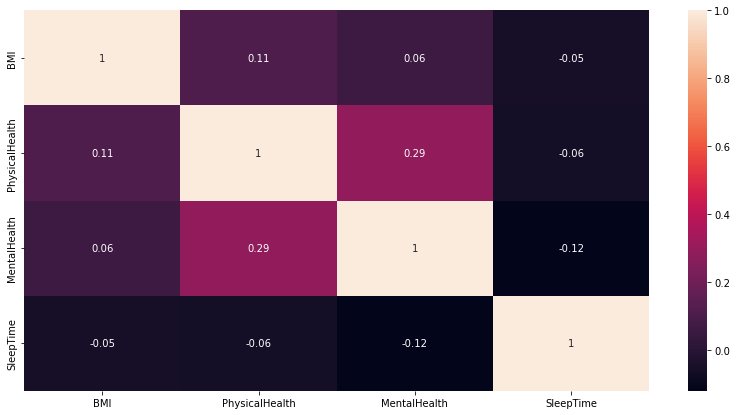

In [10]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

In [11]:
norm_data = dataset.copy()
  
# apply normalization techniques on Column 1
column = 'PhysicalHealth'
column2='BMI'
column3 = 'MentalHealth'
column4='SleepTime'
dataset[column] = (norm_data[column]-norm_data[column].min()) /(norm_data[column].max()-norm_data[column].min())
dataset[column2] = (norm_data[column2]-norm_data[column].min()) /(norm_data[column2].max()-norm_data[column2].min())
dataset[column3] = (norm_data[column3]-norm_data[column].min()) /(norm_data[column3].max()-norm_data[column3].min())
dataset[column4] = (norm_data[column4]-norm_data[column4].min()) /(norm_data[column4].max()-norm_data[column4].min())
  
# view normalized data
display(dataset)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.200410,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.245563,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.320898,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.292285,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.286249,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,0.330919,Yes,No,No,0.233333,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,0.217391,Yes,No,No
319791,No,0.360256,Yes,No,No,0.000000,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,0.173913,Yes,No,No
319792,No,0.292648,No,No,No,0.000000,0.0,No,Female,45-49,Hispanic,No,Yes,Good,0.217391,No,No,No
319793,No,0.396113,No,No,No,0.000000,0.0,No,Female,25-29,Hispanic,No,No,Good,0.478261,No,No,No


In [12]:
Bin_variables = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke","DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.str.upper())


In [13]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,NO,0.200410,YES,NO,NO,0.100000,1.0,NO,Female,55-59,White,Yes,YES,Very good,0.173913,YES,NO,YES
1,NO,0.245563,NO,NO,YES,0.000000,0.0,NO,Female,80 or older,White,No,YES,Very good,0.260870,NO,NO,NO
2,NO,0.320898,YES,NO,NO,0.666667,1.0,NO,Male,65-69,White,Yes,YES,Fair,0.304348,YES,NO,NO
3,NO,0.292285,NO,NO,NO,0.000000,0.0,NO,Female,75-79,White,No,NO,Good,0.217391,NO,NO,YES
4,NO,0.286249,NO,NO,NO,0.933333,0.0,YES,Female,40-44,White,No,YES,Very good,0.304348,NO,NO,NO


In [14]:
dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.map({'YES':1,'NO':0}))

In [15]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,Female,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,Female,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,Male,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,Female,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,Female,40-44,White,No,1,Very good,0.304348,0,0,0


In [16]:
dataset['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [17]:
dataset.replace(('Male','Female'),(1,0),inplace=True)
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,40-44,White,No,1,Very good,0.304348,0,0,0


In [18]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Diabetic']= label_encoder.fit_transform(dataset['Diabetic'])
dataset['AgeCategory']= label_encoder.fit_transform(dataset['AgeCategory'])
dataset['Race']= label_encoder.fit_transform(dataset['Race'])
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,Very good,0.304348,0,0,0


In [19]:
dataset.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [20]:
d1=['GenHealth']
dataset[d1] = dataset[d1].apply(lambda x: x.map({'Very good':3,'Good':2,'Excellent':4,'Fair':1,'Poor':0}))
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,3,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,3,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,3,0.304348,0,0,0


<AxesSubplot:>

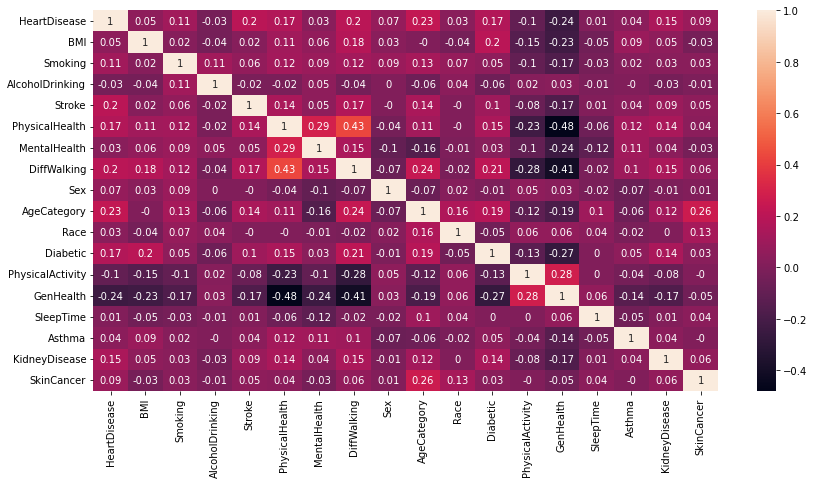

In [21]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

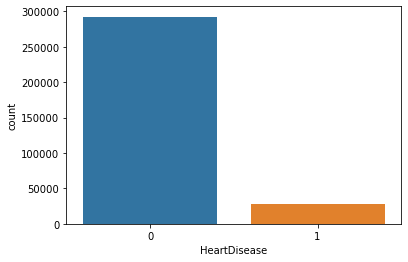

In [22]:
sns.countplot(x='HeartDisease', data=dataset)

## People with smoking as a habit and effected by heart disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

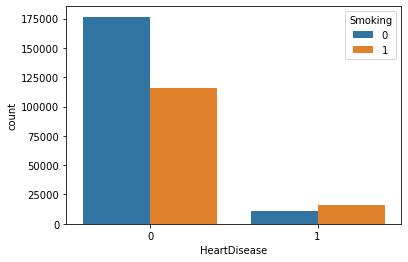

In [23]:
sns.countplot(x="HeartDisease", hue="Smoking", data=dataset)

### People with Alcohal Drinking as a habit and affected with Heart Disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

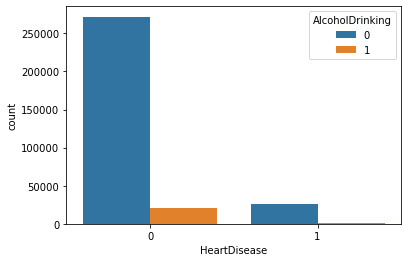

In [24]:
sns.countplot(x="HeartDisease", hue="AlcoholDrinking", data=dataset)

## People having Heart Disease basing on Gender

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

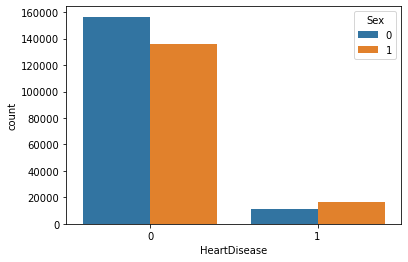

In [25]:
sns.countplot(x="HeartDisease", hue="Sex", data=dataset)

## People facing difficulty in walking and affected with Heart Disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

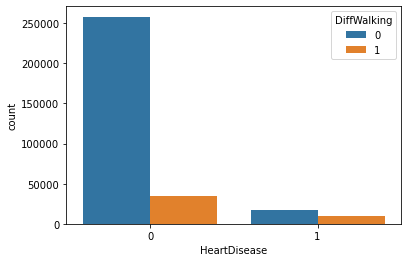

In [26]:
sns.countplot(x="HeartDisease", hue="DiffWalking", data=dataset)

## People with Heart Disease basing on Race

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

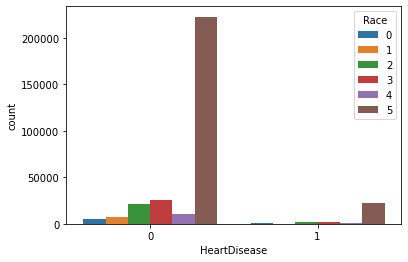

In [27]:
sns.countplot(x="HeartDisease", hue="Race", data=dataset)

## People with Diabetics and affected by Heart Disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

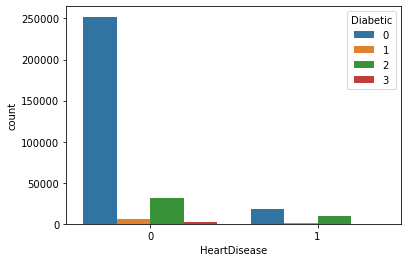

In [28]:
sns.countplot(x="HeartDisease", hue="Diabetic", data=dataset)

## People with Asthma and affected by Heart Disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

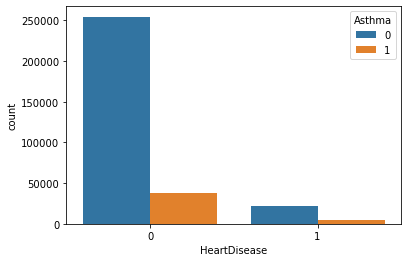

In [29]:
sns.countplot(x="HeartDisease", hue="Asthma", data=dataset)

## People with Heart Disease basing on their General Health

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

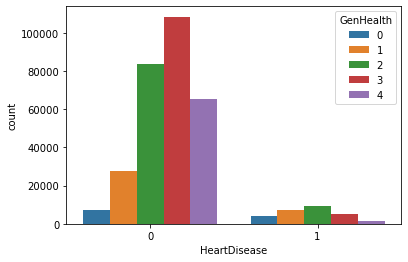

In [30]:
sns.countplot(x="HeartDisease", hue="GenHealth", data=dataset)

## People with Kideney diseases and affected by Heart Diseases

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

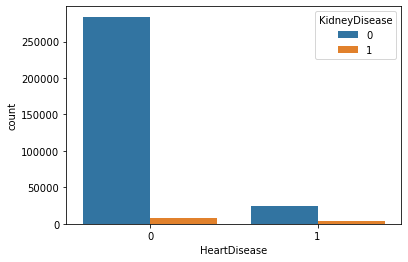

In [31]:
sns.countplot(x="HeartDisease", hue="KidneyDisease", data=dataset)

## People with Skin Cancer and with Heart Disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

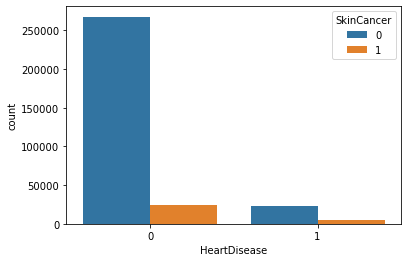

In [32]:
sns.countplot(x="HeartDisease", hue="SkinCancer", data=dataset)

<AxesSubplot:ylabel='Frequency'>

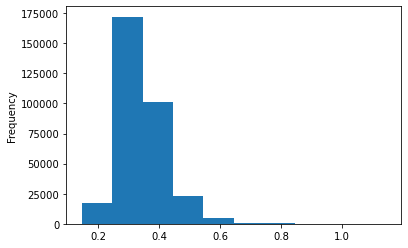

In [33]:
dataset["BMI"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

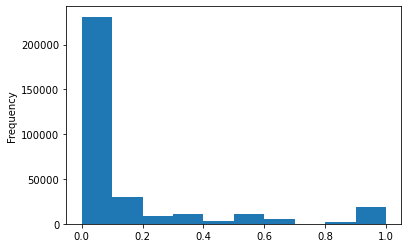

In [34]:
dataset["MentalHealth"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

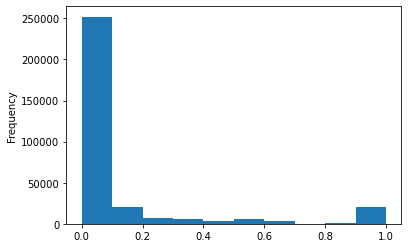

In [35]:
dataset["PhysicalHealth"].plot.hist()

## Over Sampling

In [36]:
dataset.head()

dataset1=dataset.copy()

In [37]:
dataset1.shape

(319795, 18)

In [38]:
print(sorted(Counter(dataset['HeartDisease']).items()))

[(0, 292422), (1, 27373)]


In [39]:
X1 = dataset1.drop(['HeartDisease'], axis=1)
y1 = dataset1['HeartDisease']

In [40]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=101)
X, y = sm.fit_resample(X1, y1)

In [41]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [42]:
print(sorted(Counter(dataset['HeartDisease']).items()))

[(0, 292422), (1, 27373)]


<AxesSubplot:ylabel='Frequency'>

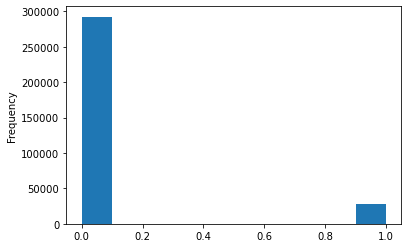

In [43]:
dataset["HeartDisease"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

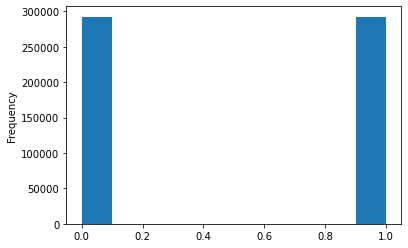

In [44]:
dataset_preprocessed = pd.concat([X, y], axis=1)
dataset_preprocessed["HeartDisease"].plot.hist()

In [45]:
dataset_preprocessed.shape

(584844, 18)

# Train Test Split

In [46]:
 X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Naive Bayes

In [47]:
# XN = dataset.drop(['HeartDisease'], axis=1)
# yN = dataset['HeartDisease']

# from sklearn.model_selection import train_test_split
# X_trainN, X_testN,y_trainN,y_testN = train_test_split(XN,yN,test_size=0.40,random_state=42)




In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 

naiveBayes = GaussianNB()
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
naiveBayes.fit(X_train, y_train)

y_predN = naiveBayes.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predN))



Accuracy: 0.706532766423108


C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


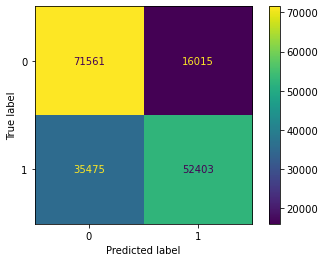

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naiveBayes, X_test, y_test)  
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predN))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74     87576
           1       0.77      0.60      0.67     87878

    accuracy                           0.71    175454
   macro avg       0.72      0.71      0.70    175454
weighted avg       0.72      0.71      0.70    175454



In [51]:
# from sklearn.ensemble import BaggingClassifier
# clf = BaggingClassifier(base_estimator=GaussianNB(), random_state=0).fit(X, y)

# y_pred = clf.predict(X_test)
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred)) 
# print(classification_report(y_test,y_pred))

## Decision Tree Algorithm

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf_decision=DecisionTreeClassifier(criterion='gini',max_depth=5)
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
clf_decision = clf_decision.fit(X_train,y_train)
y_pred = clf_decision.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.7519121821104107


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[64019, 23557],
       [19971, 67907]], dtype=int64)

In [54]:
##dataset_preprocessed = pd.concat([X_resampled, y_resampled], axis=1)
##dataset_preprocessed.head()

In [55]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7424451150179305

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.77274175561574

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     87576
           1       0.74      0.77      0.76     87878

    accuracy                           0.75    175454
   macro avg       0.75      0.75      0.75    175454
weighted avg       0.75      0.75      0.75    175454



C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


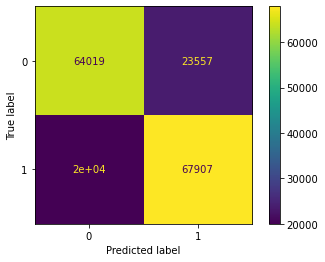

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(clf_decision, X_test, y_test)  
plt.show()

## Logistic Regression Algorithm

In [59]:
dup_dataset = dataset.copy()
dup_dataset.drop(['BMI','PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime','GenHealth', 'Race', 'Diabetic'], axis=1, inplace=True)

In [60]:
# X = dup_dataset.drop('HeartDisease', axis=1)
# y = dup_dataset['HeartDisease']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
clf=logistic_model.fit(X_train, y_train)

In [61]:
predictions = logistic_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     87576
           1       0.76      0.78      0.77     87878

    accuracy                           0.76    175454
   macro avg       0.76      0.76      0.76    175454
weighted avg       0.76      0.76      0.76    175454



In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[65475, 22101],
       [19310, 68568]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7639780227296044

In [64]:
# score = cross_val_score(logistic_model, X_train, y_train, cv=10)
# score

In [65]:
# print(np.mean(score))

C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


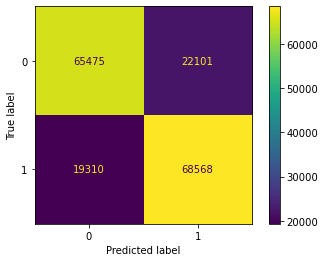

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

### Random Forest Algorithm

In [67]:
from imblearn.over_sampling import SMOTE
# X1 = dataset_preprocessed.drop('HeartDisease', axis=1)
# y1 = dataset_preprocessed['HeartDisease']

#sm = SMOTE(random_state=42)
#X, y = sm.fit_resample(X1, y1)

In [68]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30)

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [70]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9642356401107983


C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


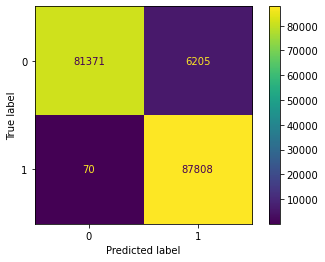

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     87576
           1       0.93      1.00      0.97     87878

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



In [73]:
from sklearn.model_selection import cross_val_score
#score = cross_val_score(logistic_model, X_train, y_train, cv=10)
 #score

# score = cross_val_score(clf, X_train, y_train, cv=10)
# score
# print(np.mean(score))

In [74]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=0).fit(X, y)

In [75]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred)) 

[[86023  1553]
 [    8 87870]]


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     87576
           1       0.98      1.00      0.99     87878

    accuracy                           0.99    175454
   macro avg       0.99      0.99      0.99    175454
weighted avg       0.99      0.99      0.99    175454



In [77]:
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
#print(np.mean(score))

[0.94054569 0.94003273 0.94086324 0.94083881 0.94013044 0.93932436
 0.94113193 0.94149833 0.9395442  0.94320819]


In [78]:
print(np.mean(score))

0.940711790713012


In [79]:
score

array([0.94054569, 0.94003273, 0.94086324, 0.94083881, 0.94013044,
       0.93932436, 0.94113193, 0.94149833, 0.9395442 , 0.94320819])

## SVM

In [80]:
X1 = dataset.drop(['HeartDisease'], axis=1)
y1 = dataset['HeartDisease']

from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=101,replacement=True)
X, y = sm.fit_resample(X1, y1)


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [82]:
from sklearn.svm import SVC
svmmodel = SVC(gamma='auto',kernel='rbf')
svmmodel.fit(X_train, y_train)

SVC(gamma='auto')

In [83]:
y_pred = svmmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5727 2405]
 [1432 6860]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      8132
           1       0.74      0.83      0.78      8292

    accuracy                           0.77     16424
   macro avg       0.77      0.77      0.77     16424
weighted avg       0.77      0.77      0.77     16424



C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


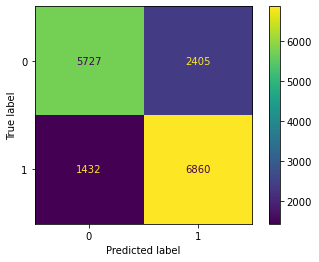

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmmodel, X_test, y_test)  
plt.show()

In [85]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7404209390178089

In [86]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8273034249879402

In [87]:
# from sklearn.ensemble import BaggingClassifier
# clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X, y)

In [88]:
# y_pred = clf.predict(X_test)
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred)) 
# print(classification_report(y_test,y_pred))

In [89]:
# print(classification_report(y_test,y_pred))